## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
historical_df = pd.read_csv("historical_data.csv")
fear_greed_df = pd.read_csv("fear_greed_index.csv")

In [3]:
# first 5 rows of the data
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
# last 5 rows of the data
historical_df.tail(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [5]:
# first 5 rows of the data
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
# last 5 rows of the data
fear_greed_df.tail(5)

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [7]:
# number of rows and columns in this historical dataset
historical_df.shape

(211224, 16)

In [8]:
# number of rows and columns in this fear greed dataset
fear_greed_df.shape

(2644, 4)

In [9]:
# about the columns
historical_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [10]:
# about the columns
fear_greed_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

## Data cleaning

### Convert timestamps to datetime

In [11]:
# Convert the Timestamp column from milliseconds to datetime format
historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'], unit='ms', errors='coerce')

In [12]:
# Convert the Timestamp IST column to datetime format
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], errors='coerce')

In [13]:
# Convert the date column in the Fear & Greed dataset to proper datetime format
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce')

### Drop duplicates

In [14]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
historical_df=historical_df.drop_duplicates()

In [15]:
# check for missing values, count them and print the sum for every column
historical_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [16]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
fear_greed_df=fear_greed_df.drop_duplicates()

In [17]:
# check for missing values, count them and print the sum for every column
fear_greed_df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

### Extract date

In [18]:
# Extract only the date part from the 'Timestamp' column (removing time) 
historical_df['date'] = historical_df['Timestamp'].dt.date

In [19]:
# convert it back into a proper datetime object for merging
historical_df['date'] = pd.to_datetime(historical_df['date'])

In [20]:
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27


In [21]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


## Merge Both Datasets

In [22]:
merged_df = historical_df.merge(fear_greed_df, on='date', how='left')

In [23]:
merged_df[['date', 'value', 'classification']].head(10)

,date,value,classification
0,2024-10-27,74.0,Greed
1,2024-10-27,74.0,Greed
2,2024-10-27,74.0,Greed
3,2024-10-27,74.0,Greed
4,2024-10-27,74.0,Greed
5,2024-10-27,74.0,Greed
6,2024-10-27,74.0,Greed
7,2024-10-27,74.0,Greed
8,2024-10-27,74.0,Greed
9,2024-10-27,74.0,Greed


### Daily pnl calculation

In [24]:
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum().reset_index()

In [25]:
daily_pnl.head()

,date,Closed PnL
0,2023-03-28,0.000000e+00
1,2023-11-14,1.555034e+02
2,2024-03-09,1.769655e+05
3,2024-07-03,1.587424e+05
4,2024-10-27,3.189461e+06


### Merge daily pnl and markent sentiment

In [26]:
analysis_df = daily_pnl.merge(fear_greed_df[['date', 'value', 'classification']], on='date', how='left')

In [27]:
analysis_df.head()

,date,Closed PnL,value,classification
0,2023-03-28,0.000000e+00,59.0,Greed
1,2023-11-14,1.555034e+02,69.0,Greed
2,2024-03-09,1.769655e+05,84.0,Extreme Greed
3,2024-07-03,1.587424e+05,50.0,Neutral
4,2024-10-27,3.189461e+06,74.0,Greed


## Analysis

In [28]:
# average pnl
analysis_df.groupby("classification")["Closed PnL"].mean()

classification
Extreme Greed    1.769655e+05
Fear             6.699925e+06
Greed            1.063206e+06
Neutral          1.587424e+05
Name: Closed PnL, dtype: float64

## Visualization

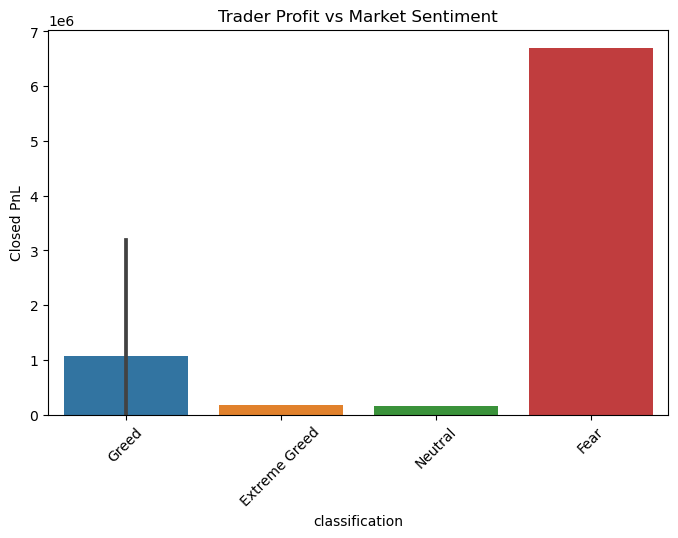

In [29]:
# pnl vs sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=analysis_df, x="classification", y="Closed PnL")
plt.xticks(rotation=45)
plt.title("Trader Profit vs Market Sentiment")
plt.show()

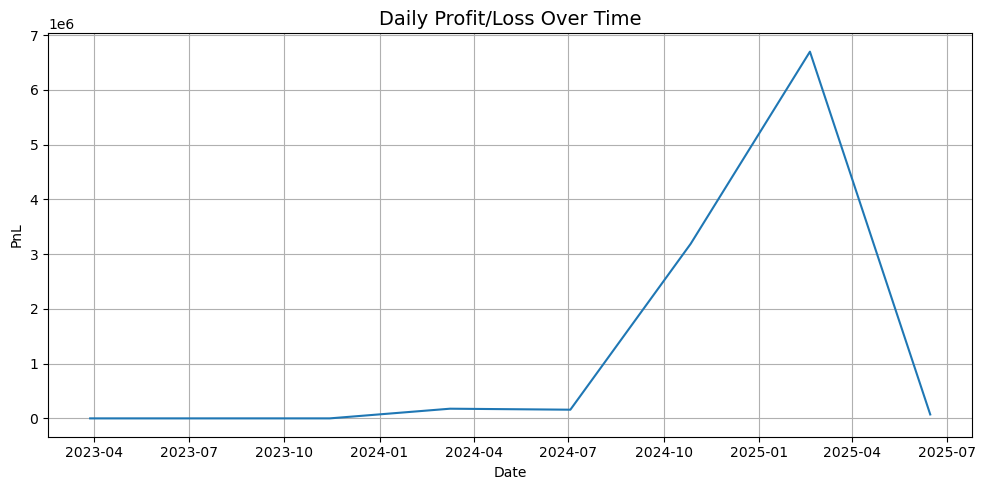

In [30]:
# daily pnl trend
plt.figure(figsize=(10,5))
plt.plot(daily_pnl['date'], daily_pnl['Closed PnL'])
plt.title("Daily Profit/Loss Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("PnL")
plt.grid(True)
plt.tight_layout()
plt.show()